In [136]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn import tree

In [10]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [12]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
df

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. ¤ 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,2022-058,2022-058-01,2022-058-01-01,2022-058-01-01-01,6/22/2023,1,599 U.S. 533,143 S. Ct. 1900,216 L. Ed. 2d 521,2023 U.S. LEXIS 2635,2022,1710,Roberts,22-381,YEGIAZARYAN v. SMAGIN,4/25/2023,NaN,137.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,NaN,4.0,NaN,3.0,362.0,NaN,113.0,111.0,1,6,3
13850,2022-058,2022-058-02,2022-058-02-01,2022-058-02-01-01,6/22/2023,1,599 U.S. 533,143 S. Ct. 1900,216 L. Ed. 2d 521,2023 U.S. LEXIS 2635,2022,1710,Roberts,22383,"CMB MONACO, FKA COMPAGNIE MONEGASQUE DE BANQUE...",4/25/2023,NaN,113.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,0.0,4.0,NaN,3.0,362.0,NaN,113.0,111.0,1,6,3
13851,2022-059,2022-059-01,2022-059-01-01,2022-059-01-01-01,5/25/2023,1,598 U.S. 631,143 S. Ct. 1369,215 L. Ed. 2d 564,2023 U.S. LEXIS 2201,2022,1710,Roberts,22-166,"TYLER v. HENNEPIN COUNTY, MINNESOTA",4/26/2023,NaN,138.0,NaN,5.0,28.0,1.0,NaN,NaN,0.0,83.0,NaN,28.0,NaN,0.0,12.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,40070.0,4.0,1.0,NaN,2.0,NaN,2.0,211.0,NaN,111.0,111.0,1,9,0
13852,2022-061,2022-061-01,2022-061-01-01,2022-061-01-01-01,5/22/2023,2,598 U.S. 623,143 S. Ct. 1317,215 L. Ed. 2d 557,2023 U.S. LEXIS 2063,2022,1710,Roberts,22-714,CALCUTT v. FDI

In [16]:
df.dtypes

caseId                       object
docketId                     object
caseIssuesId                 object
voteId                       object
dateDecision                 object
decisionType                  int64
usCite                       object
sctCite                      object
ledCite                      object
lexisCite                    object
term                          int64
naturalCourt                  int64
chief                        object
docket                       object
caseName                     object
dateArgument                 object
dateRearg                    object
petitioner                  float64
petitionerState             float64
respondent                  float64
respondentState             float64
jurisdiction                float64
adminAction                 float64
adminActionState            float64
threeJudgeFdc               float64
caseOrigin                  float64
caseOriginState             float64
caseSource                  

In [5]:
#df=df.set_index("voteId")

In [18]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. ¤ 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3


In [54]:
dfwork=df[["decisionType",
"term",
"dateDecision",
"petitioner",
"petitionerState",
"respondent",
"respondentState",
"jurisdiction",
"adminAction",
"adminActionState",
"threeJudgeFdc",
"caseOrigin",
"caseOriginState",
"caseSource",
"caseSourceState",
"lcDisagreement",
"certReason",
"lcDisposition",
"lcDispositionDirection",
"declarationUncon",
"caseDisposition",
"caseDispositionUnusual",
"partyWinning",
"precedentAlteration",
"voteUnclear",
"issue",
"issueArea",
"decisionDirection",
"decisionDirectionDissent",
"authorityDecision1",
"authorityDecision2",
"lawSupp",
"majOpinWriter",
"majOpinAssigner",
"majVotes",
"minVotes"]]
dfwork

,decisionType,term,dateDecision,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawSupp,majOpinWriter,majOpinAssigner,majVotes,minVotes
0,1,1946,11/18/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,600.0,78.0,78.0,8,1
1,1,1946,11/18/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
2,1,1946,11/18/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
3,1,1946,11/18/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
4,1,1946,11/18/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,1,2022,6/22/2023,137.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,NaN,4.0,NaN,362.0,113.0,111.0,6,3
13850,1,2022,6/22/2023,113.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,0.0,4.0,NaN,362.0,113.0,111.0,6,3
13851,1,2022,5/25/2023,138.0,NaN,5.0,28.0,1.0,NaN,NaN,0.0,83.0,NaN,28.0,NaN,0.0,12.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,40070.0,4.0,1.0,NaN,2.0,NaN,211.0,111.0,111.0,9,0
13852,2,2022,5/22/2023,113.0,NaN,341.0,NaN,1.0,41.0,NaN,0.0,26.0,NaN,26.0,NaN,0.0,12.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0,80350.0,8.0,1.0,NaN,4.0,NaN,600.0,NaN,111.0,9,0


In [78]:
#change decision date to DT
dfwork['dateDecision'] = pd.to_datetime(dfwork['dateDecision'], errors='coerce')

/var/folders/0g/tb3r02zj1s708551wrk14cs40000gn/T/ipykernel_9169/4275087251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwork['dateDecision'] = pd.to_datetime(dfwork['dateDecision'], errors='coerce')


In [80]:
dfwork.dtypes

decisionType                         int64
term                                 int64
dateDecision                datetime64[ns]
petitioner                         float64
petitionerState                    float64
respondent                         float64
respondentState                    float64
jurisdiction                       float64
adminAction                        float64
adminActionState                   float64
threeJudgeFdc                      float64
caseOrigin                         float64
caseOriginState                    float64
caseSource                         float64
caseSourceState                    float64
lcDisagreement                     float64
certReason                         float64
lcDisposition                      float64
lcDispositionDirection             float64
declarationUncon                   float64
caseDisposition                    float64
caseDispositionUnusual             float64
partyWinning                       float64
precedentAl

In [94]:
y=dfwork["caseDisposition"]
X=dfwork.drop(columns=["caseDisposition"])

In [96]:
nullYvals = y.isna().sum()
print(nullYvals)

166


In [98]:
y=y.fillna(12)

In [100]:
nullYvals = y.isna().sum()
print(nullYvals)

0


In [102]:
nullXvals = X.isna().sum()
print(nullXvals)

decisionType                    0
term                            0
dateDecision                    0
petitioner                      3
petitionerState             11124
respondent                     10
respondentState             10082
jurisdiction                    2
adminAction                  9663
adminActionState            12772
threeJudgeFdc                  24
caseOrigin                    475
caseOriginState             10161
caseSource                    294
caseSourceState             10765
lcDisagreement                 26
certReason                    128
lcDisposition                2288
lcDispositionDirection        259
declarationUncon                1
caseDispositionUnusual          1
partyWinning                   21
precedentAlteration             1
voteUnclear                     3
issue                          70
issueArea                      70
decisionDirection              43
decisionDirectionDissent      295
authorityDecision1             76
authorityDecis

In [104]:
X=X.copy()

In [106]:
X=X.fillna(0)

In [108]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

In [110]:
X_transformed = ohe.fit_transform(X)

#X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
X_transformed

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [112]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=1)

In [114]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [130]:
# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.60      0.53      0.56        17
         2.0       0.95      0.96      0.96      1125
         3.0       0.66      0.67      0.67       709
         4.0       0.65      0.70      0.67       871
         5.0       0.64      0.53      0.58       402
         6.0       0.80      0.64      0.72        76
         7.0       0.73      0.56      0.63       114
         8.0       0.55      0.38      0.44        16
         9.0       0.76      0.83      0.80       101
        10.0       1.00      0.75      0.86         4
        11.0       0.00      0.00      0.00         0
        12.0       0.90      0.90      0.90        29

    accuracy                           0.76      3464
   macro avg       0.69      0.62      0.65      3464
weighted avg       0.76      0.76      0.76      3464



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test, y_test)}")

Training Data Score: 0.9998075072184793
Testing Data Score: 0.7580831408775982


In [142]:
print(X_train.shape)

(10390, 4514)


In [150]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df.head()

,train,test
depth,,
1,0.307122,0.324769
3,0.311742,0.328522
5,0.542156,0.544457
7,0.618672,0.615185
9,0.668912,0.642610


<Axes: xlabel='depth'>

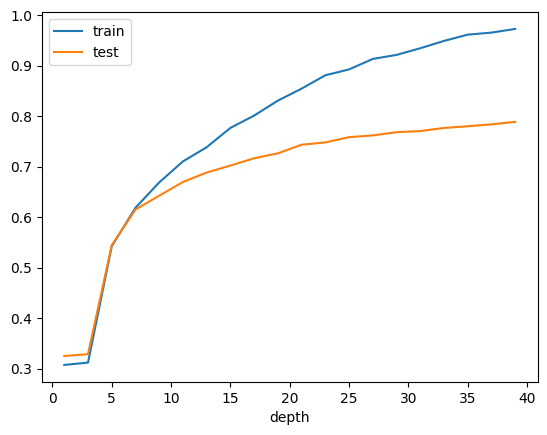

In [151]:
# Plot the scores dataframe with the plot method
scores_df.plot()

In [144]:
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

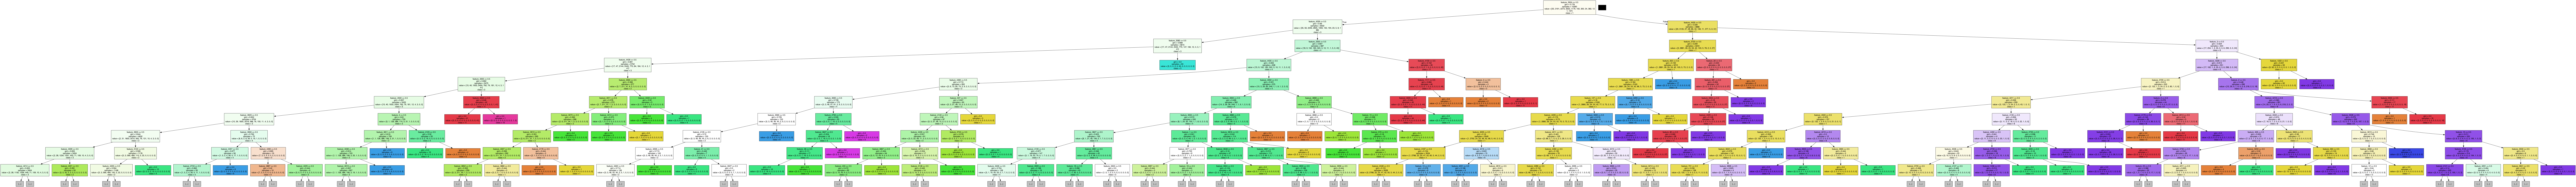

In [154]:
# Create a decision tree graph
# Create DOT data
dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=feature_names, class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], filled=True, max_depth=9
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [156]:
# When saving the image, graph.write_<file_type>() must take a string object

# Save the tree as PDF
file_path = "tree.pdf"
graph.write_pdf(file_path)

# Save the tree as PNG
file_path = "tree.png"
graph.write_png(file_path)

True